In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 140
from scipy.optimize import leastsq

#import pandas as pd

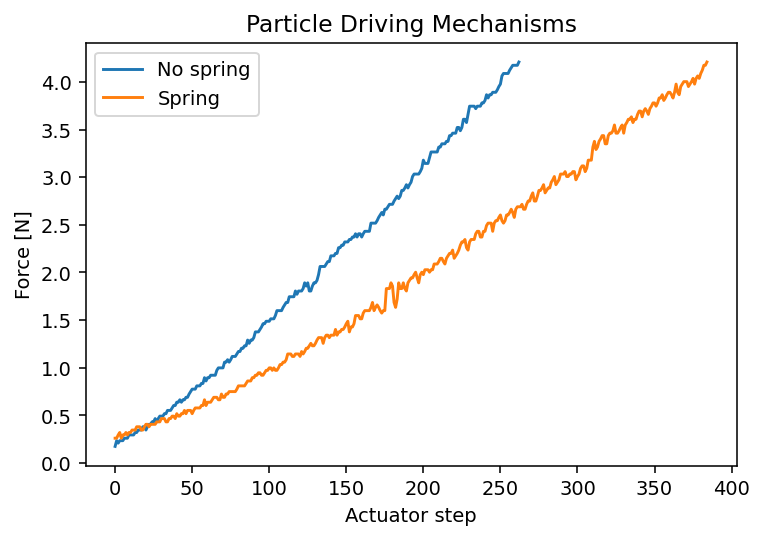

In [2]:
dataPath = '/eno/jdfeathe/DATA/SpringConstant/'

# Found for EMPANADA data; couldn't hurt to redo this measurement though
loadCellToNewtonsFactor = .00859
cropStart = [350, 520]

fArr = np.genfromtxt(dataPath + 'SpringConst_3p.CSV')[cropStart[0]:,1] * loadCellToNewtonsFactor
fSprArr = np.genfromtxt(dataPath + 'SpringConst_2p1spp.CSV')[cropStart[1]:,1] * loadCellToNewtonsFactor

plt.plot(fArr, label='No spring')
plt.plot(fSprArr, label='Spring')

plt.xlabel('Actuator step')
plt.ylabel('Force [N]')

plt.title('Particle Driving Mechanisms')
plt.legend()
plt.savefig('spring_constant.png')
plt.show()